In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [29]:
data=pd.read_csv("Loan Prediction.csv")
data.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [30]:
data=data.drop("Id",axis=1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


In [32]:
data.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# EDA

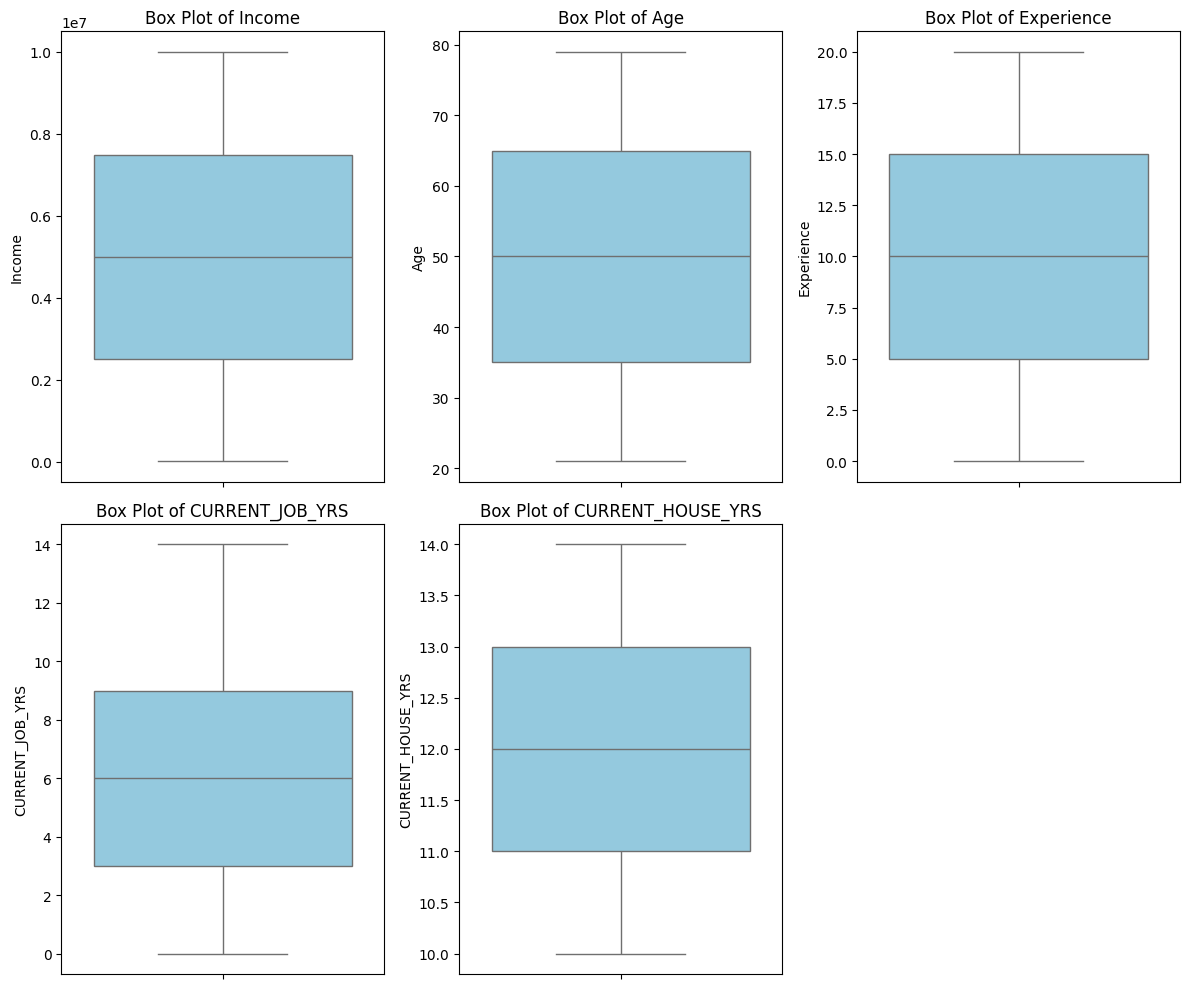

In [36]:
numerical_columns = ["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS"]
plt.figure(figsize=(12, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i) 
    sns.boxplot(y=data[column], color="skyblue")
    plt.title(f"Box Plot of {column}")

plt.tight_layout()  
plt.show()


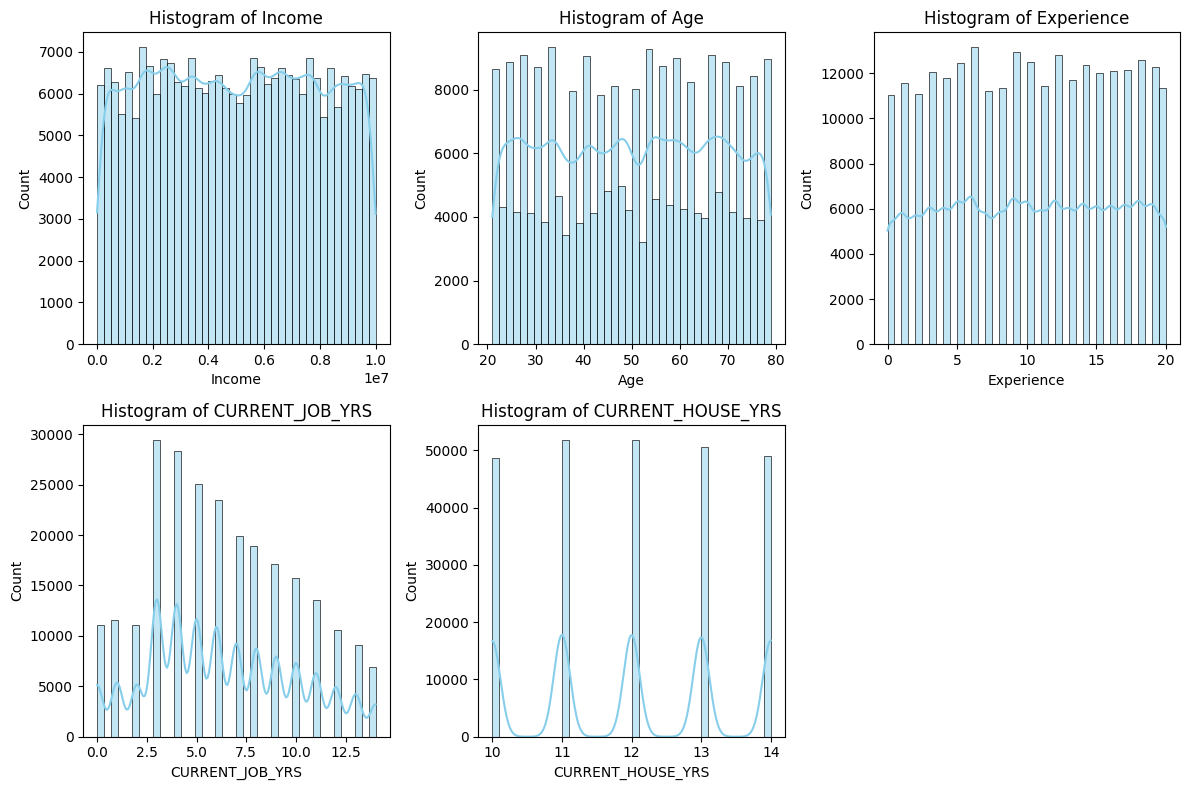

In [41]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  
    sns.histplot(data[column], bins=40, kde=True, color="skyblue")
    plt.title(f"Histogram of {column}")

plt.tight_layout()  
plt.show()


# Feature Engineering

In [12]:
label_encoders = {}
categorical_cols = ["Married/Single", "House_Ownership", "Car_Ownership", "Profession", "CITY", "STATE"]
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

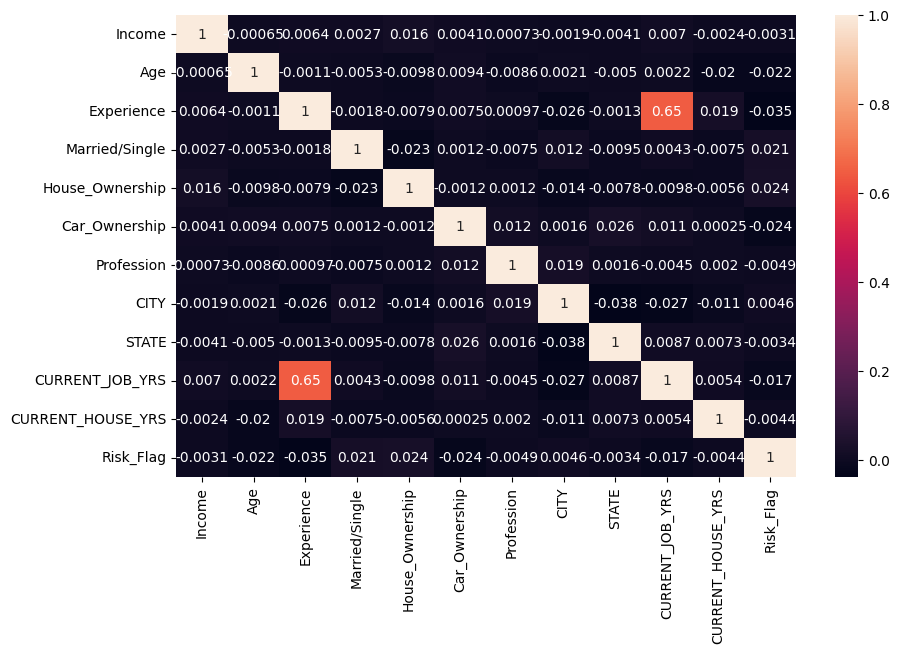

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [14]:
X = data.drop(columns=["Risk_Flag"]) 
y = data["Risk_Flag"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN 

In [15]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dropout(0.3),
    Dense(32, activation='relu'), 
    Dropout(0.2),
    Dense(1, activation='sigmoid') 
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 4s 528us/step - accuracy: 0.8753 - loss: 0.3859 - val_accuracy: 0.8770 - val_loss: 0.3719
Epoch 2/50
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 502us/step - accuracy: 0.8774 - loss: 0.3709 - val_accuracy: 0.8770 - val_loss: 0.3688
Epoch 3/50
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 519us/step - accuracy: 0.8760 - loss: 0.3714 - val_accuracy: 0.8770 - val_loss: 0.3671
Epoch 4/50
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 503us/step - accuracy: 0.8767 - loss: 0.3680 - val_accuracy: 0.8770 - val_loss: 0.3655
Epoch 5/50
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 510us/step - accuracy: 0.8776 - loss: 0.3651 - val_accuracy: 0.8770 - val_loss: 0.3635
Epoch 6/50
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 518us/step - accuracy: 0.8768 - loss: 0.3648 - val_accuracy: 0.8770 - val_loss: 0.3613
Epoch 7/50
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 510us/step - accuracy: 0.8768 - loss: 0.3636 - val_accuracy: 0.8770 - val_loss: 0.3598
Epoch 8/50
6300/6300 ━━━━━━━━━━━━━━━━━━━━ 3s 506us/step - accuracy: 0.8770 -

# Results

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

1575/1575 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.8803 - loss: 0.3369
Test Accuracy: 0.8784


In [22]:
y_pred_prob = model.predict(X_test) 
y_pred = (y_pred_prob > 0.5).astype("int32")

1575/1575 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step
